In [1]:
%tensorflow_version 1.4

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical as tcg
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.utils import plot_model
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
#Splitting Test and Validation data
(xtr, ytr), (xte, yte) = mnist.load_data()

In [3]:
#Uploading an image to predict
files.upload()

Saving handwritten1.jpg to handwritten1 (1).jpg


{'handwritten1.jpg': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa6\x00\x00\x01/\x08\x03\x00\x00\x00\xf8\x9eJ\xe1\x00\x00\x00\x84PLTE\xff\xff\xff\x00\x00\x00\xfc\xfc\xfc\xef\xef\xef\xf7\xf7\xf7\xf8\xf8\xf8\xea\xea\xea\xf4\xf4\xf4\xd2\xd2\xd2jjj\xe3\xe3\xe3\xdd\xdd\xdd\x8d\x8d\x8d\xe0\xe0\xe0\xc4\xc4\xc4\xb0\xb0\xb0\x9c\x9c\x9c\'\'\'vvv\x95\x95\x95"""ooo\x85\x85\x85TTT***\x1a\x1a\x1azzz\xcc\xcc\xcc@@@ddd\xbb\xbb\xbb[[[333\x89\x89\x89KKK\x10\x10\x10\xa3\xa3\xa3999\xb6\xb6\xb6\xa9\xa9\xa9MMMDDD\x16\x16\x16VVV3m]>\x00\x00\tuIDATx\x9c\xd5]\xe9z\xe20\x0c\xc4\t\r\ti!%@\xb9\x96\x86B\x0f\xda\xf7\x7f\xbf%@\xb9r\x8c\x1clK\x9d\xbf\xdbn\xe7slK\x1a\x1dn\xb58\xf1\x94\xbe.\xb6Q\x12>\xb0\xb2@\xf8TGLS\xb9D\xc3\x91\xba\xc0\'7\x9d\n,\xd55\xb2\x1e7\xa32\x04\xaa\x80\x97\x98\x9bT\x11\xafE\x9aJE]nZ7\x08\xcbX\xee \xec\xcb\xbfU\xd0T}nf\x97\xa8Z\xcc\x1dBnn\x17\x88\xaai\xae\xdb\xdc\xe4N\xe8T\xb3Tj\xcc\xcd\xee\x84\x8f:\x9a\xca\xe7\xa6\xf7\x8b\xb4\x96\xe6\x86\x9b\xde/^jiF\xdc\xf4\x8e\xa89\xe79\xd62\xfc\x90\x

In [4]:
#Raw Shape of The Train and Validation data

print("XTR shape :" +str(xtr.shape))
print("XTE shape :" +str(xte.shape))
print("YTR shape :" +str(ytr.shape))
print("YTE shape :" +str(yte.shape))

XTR shape :(60000, 28, 28)
XTE shape :(10000, 28, 28)
YTR shape :(60000,)
YTE shape :(10000,)


In [5]:
#Sample of the the train data and its output

cv2_imshow(xtr[0])
print(ytr[0])

5


In [0]:
#Reshaping the train data and validation data to have 1 color channel hence Grayscale

xtr = xtr.reshape(xtr.shape[0], xtr.shape[1], xtr.shape[2], 1)
xte = xte.reshape(xte.shape[0], xte.shape[1], xte.shape[2], 1)

In [7]:
#Shape of the Train and Validation Data after reshaping

print("XTR shape :" +str(xtr.shape))
print("XTE shape :" +str(xte.shape))
print("YTR shape :" +str(ytr.shape))
print("YTE shape :" +str(yte.shape))

XTR shape :(60000, 28, 28, 1)
XTE shape :(10000, 28, 28, 1)
YTR shape :(60000,)
YTE shape :(10000,)


In [8]:
#Maximum value of a pixel in the train data

np.amax(xtr[0])

255

In [0]:
#Normalising train data to lie between 0 and 1
#Making the y data to be categorical

xtr = xtr/255
xte = xte/255

ytr = tcg(ytr)
yte = tcg(yte)

In [10]:
#Shape of the data after Converting Y to categorical

print("XTR shape :" +str(xtr.shape))
print("XTE shape :" +str(xte.shape))
print("YTR shape :" +str(ytr.shape))
print("YTE shape :" +str(yte.shape))

XTR shape :(60000, 28, 28, 1)
XTE shape :(10000, 28, 28, 1)
YTR shape :(60000, 10)
YTE shape :(10000, 10)


In [11]:
#Sample of X and Y after edits

cv2_imshow(xtr[0]*255)
print(ytr[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
model = Sequential()

#Layer 1: 16 filters, 3x3 filter size, same padding, stride 1. MaxPooling with filter size 2x2 and stride 2
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#Layer 2: 32 filters, 3x3 filter size, same padding, stride 1. MaxPooling with filter size 2x2 and stride 2
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#Layer 3: 64 filters, 3x3 filter size, same padding, stride 1. MaxPooling with filter size 2x2 and stride 2
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#Flattening the cube out
model.add(Flatten())

#Layer 4: Fully Connected layer with 500 nodes
model.add(Dense(500, activation="relu"))

#Layer 5: Fully Connected layer with 250 nodes
model.add(Dense(250, activation="relu"))

#layer 6: Fully connected layer with 10 nodes
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x=xtr, y=ytr, validation_data=(xte, yte), epochs=20, batch_size=256)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 5s 84us/step - loss: 0.3096 - acc: 0.9004 - val_loss: 0.0533 - val_acc: 0.9820
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0553 - acc: 0.9826 - val_loss: 0.0415 - val_acc: 0.9861
Epoch 3/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.0394 - acc: 0.9874 - val_loss: 0.0443 - val_acc: 0.9863
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0278 - acc: 0.9912 - val_loss: 0.0316 - val_acc: 0.9898
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0279 - val_acc: 0.9910
Epoch 7/20
60000/600

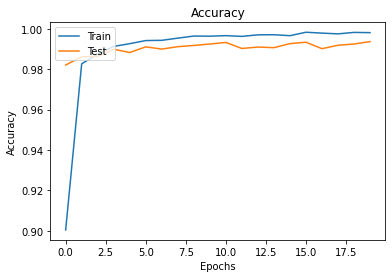

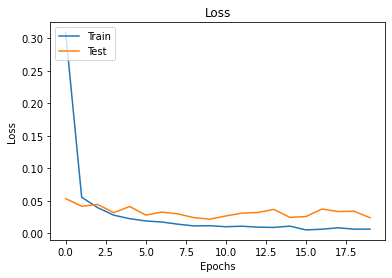

In [19]:
#Plotting Accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["Train", "Test"], loc="upper left")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#Plotting Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Train", "Test"], loc="upper left")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

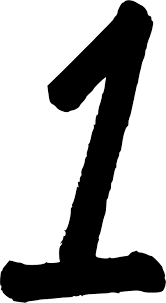

Image shape: (303, 166, 3)


In [20]:
#Reading the image to predict and printing its shape
handwritten1 = cv2.imread("handwritten1.jpg")
cv2_imshow(handwritten1)
print("Image shape: " +str(handwritten1.shape))

Image shape after changing color channels: (303, 166)


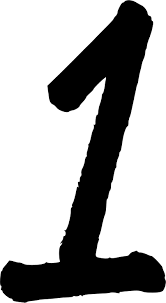

Image shape after resizing: (28, 28)


Image shape after resizing: (1, 28, 28, 1)


In [21]:
#Changing the image to Grayscale
handwritten1 = cv2.cvtColor(handwritten1, cv2.COLOR_RGB2GRAY)
print("Image shape after changing color channels: " +str(handwritten1.shape))
cv2_imshow(handwritten1)

#Resizing the image
rqd = (28, 28)
handwritten1 = cv2.resize(handwritten1, rqd)
print("Image shape after resizing: " +str(handwritten1.shape))
cv2_imshow(handwritten1)

#Reshaping the image
handwritten1 = handwritten1.reshape(1, 28, 28, 1)
print("Image shape after resizing: " +str(handwritten1.shape))

#Normalizing the pixels of the image
handwritten1 = handwritten1/255

In [22]:
#Predicting the result and calculating the index of the maximum probability
result = model.predict(handwritten1)
np.argmax(result)

1

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

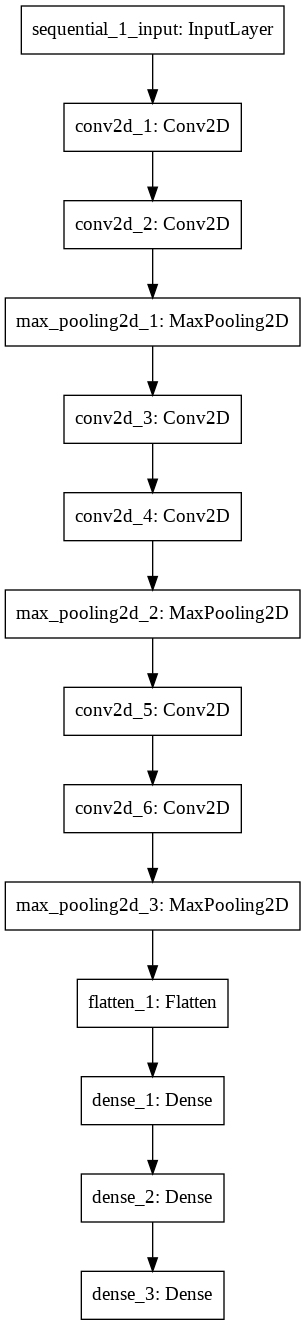

In [24]:
plot_model(model)